In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [177]:
df=pd.read_csv(r"V:\Downloads\task_8.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [178]:
print('Gender',df['gender'].unique(),'\n','SeniorCitizen',df['SeniorCitizen'].unique(),'\n','Partner',df['Partner'].unique(),'\n','Dependents',df['Dependents'].unique(),'\n','PhoneService',df['PhoneService'].unique(),'\n','MultipleLines',df['MultipleLines'].unique(),'\n','InternetService',df['InternetService'].unique(),'\n','OnlineSecurity',df['OnlineSecurity'].unique(),'\n','OnlineBackup',df['OnlineBackup'].unique(),'\n','DeviceProtection',df['DeviceProtection'].unique(),'\n','TechSupport',df['TechSupport'].unique(),'\n','StreamingTV',df['StreamingTV'].unique(),'\n','StreamingMovies',df['StreamingMovies'].unique(),'\n','Contract',df['Contract'].unique(),'\n','PaperlessBilling',df['PaperlessBilling'].unique(),'\n','PaymentMethod',df['PaymentMethod'].unique(),'\n','Churn',df['Churn'].unique())

Gender ['Female' 'Male' '1' '0'] 
 SeniorCitizen [0 1] 
 Partner ['Yes' 'No' '0' '1'] 
 Dependents ['No' 'Yes'] 
 PhoneService ['No' 'Yes'] 
 MultipleLines ['No phone service' 'No' 'Yes'] 
 InternetService ['DSL' 'Fiber optic' 'No'] 
 OnlineSecurity ['No' 'Yes' 'No internet service'] 
 OnlineBackup ['Yes' 'No' 'No internet service'] 
 DeviceProtection ['No' 'Yes' 'No internet service'] 
 TechSupport ['No' 'Yes' 'No internet service'] 
 StreamingTV ['No' 'Yes' 'No internet service'] 
 StreamingMovies ['No' 'Yes' 'No internet service'] 
 Contract ['Month-to-month' 'One year' 'Two year'] 
 PaperlessBilling ['Yes' 'No'] 
 PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
 Churn ['No' 'Yes']


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [180]:
df=df[~df['gender'].isin(['1','0'])]

In [181]:
df['PhoneService']=df['PhoneService'].map({'No':0,'Yes':1}).astype('int8')
df['MultipleLines']=df['MultipleLines'].map({'No':1,'Yes':2,'No phone service':0}).astype('int8')
df['Partner']=df['Partner'].map({'No':0,'Yes':1,'0':0,'1':1}).astype('int8')
df['Dependents']=df['Dependents'].map({'No':0,'Yes':1}).astype('int8')
df['gender']=df['gender'].map({'Male':0,'Female':1}).astype('int8')
df['InternetService']=df['InternetService'].map({'DSL':1,'Fiber optic':2,'No':0}).astype('int8')
df['OnlineSecurity']=df['OnlineSecurity'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['OnlineBackup']=df['OnlineBackup'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['DeviceProtection']=df['DeviceProtection'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['TechSupport']=df['TechSupport'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['StreamingTV']=df['StreamingTV'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['StreamingMovies']=df['StreamingMovies'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['Contract']=df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2}).astype('int8')
df['PaperlessBilling']=df['PaperlessBilling'].map({'No':0,'Yes':1}).astype('int8')
df['PaymentMethod']=df['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}).astype('int8')
df['Churn']=df['Churn'].map({'No':0,'Yes':1}).astype('int8')

In [182]:
df.drop(['customerID'],axis=1,inplace=True)

In [183]:
df.dropna(inplace=True)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7027 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   int8   
 1   SeniorCitizen     7027 non-null   int64  
 2   Partner           7027 non-null   int8   
 3   Dependents        7027 non-null   int8   
 4   tenure            7027 non-null   int64  
 5   PhoneService      7027 non-null   int8   
 6   MultipleLines     7027 non-null   int8   
 7   InternetService   7027 non-null   int8   
 8   OnlineSecurity    7027 non-null   int8   
 9   OnlineBackup      7027 non-null   int8   
 10  DeviceProtection  7027 non-null   int8   
 11  TechSupport       7027 non-null   int8   
 12  StreamingTV       7027 non-null   int8   
 13  StreamingMovies   7027 non-null   int8   
 14  Contract          7027 non-null   int8   
 15  PaperlessBilling  7027 non-null   int8   
 16  PaymentMethod     7027 non-null   int8   
 17  

<Axes: >

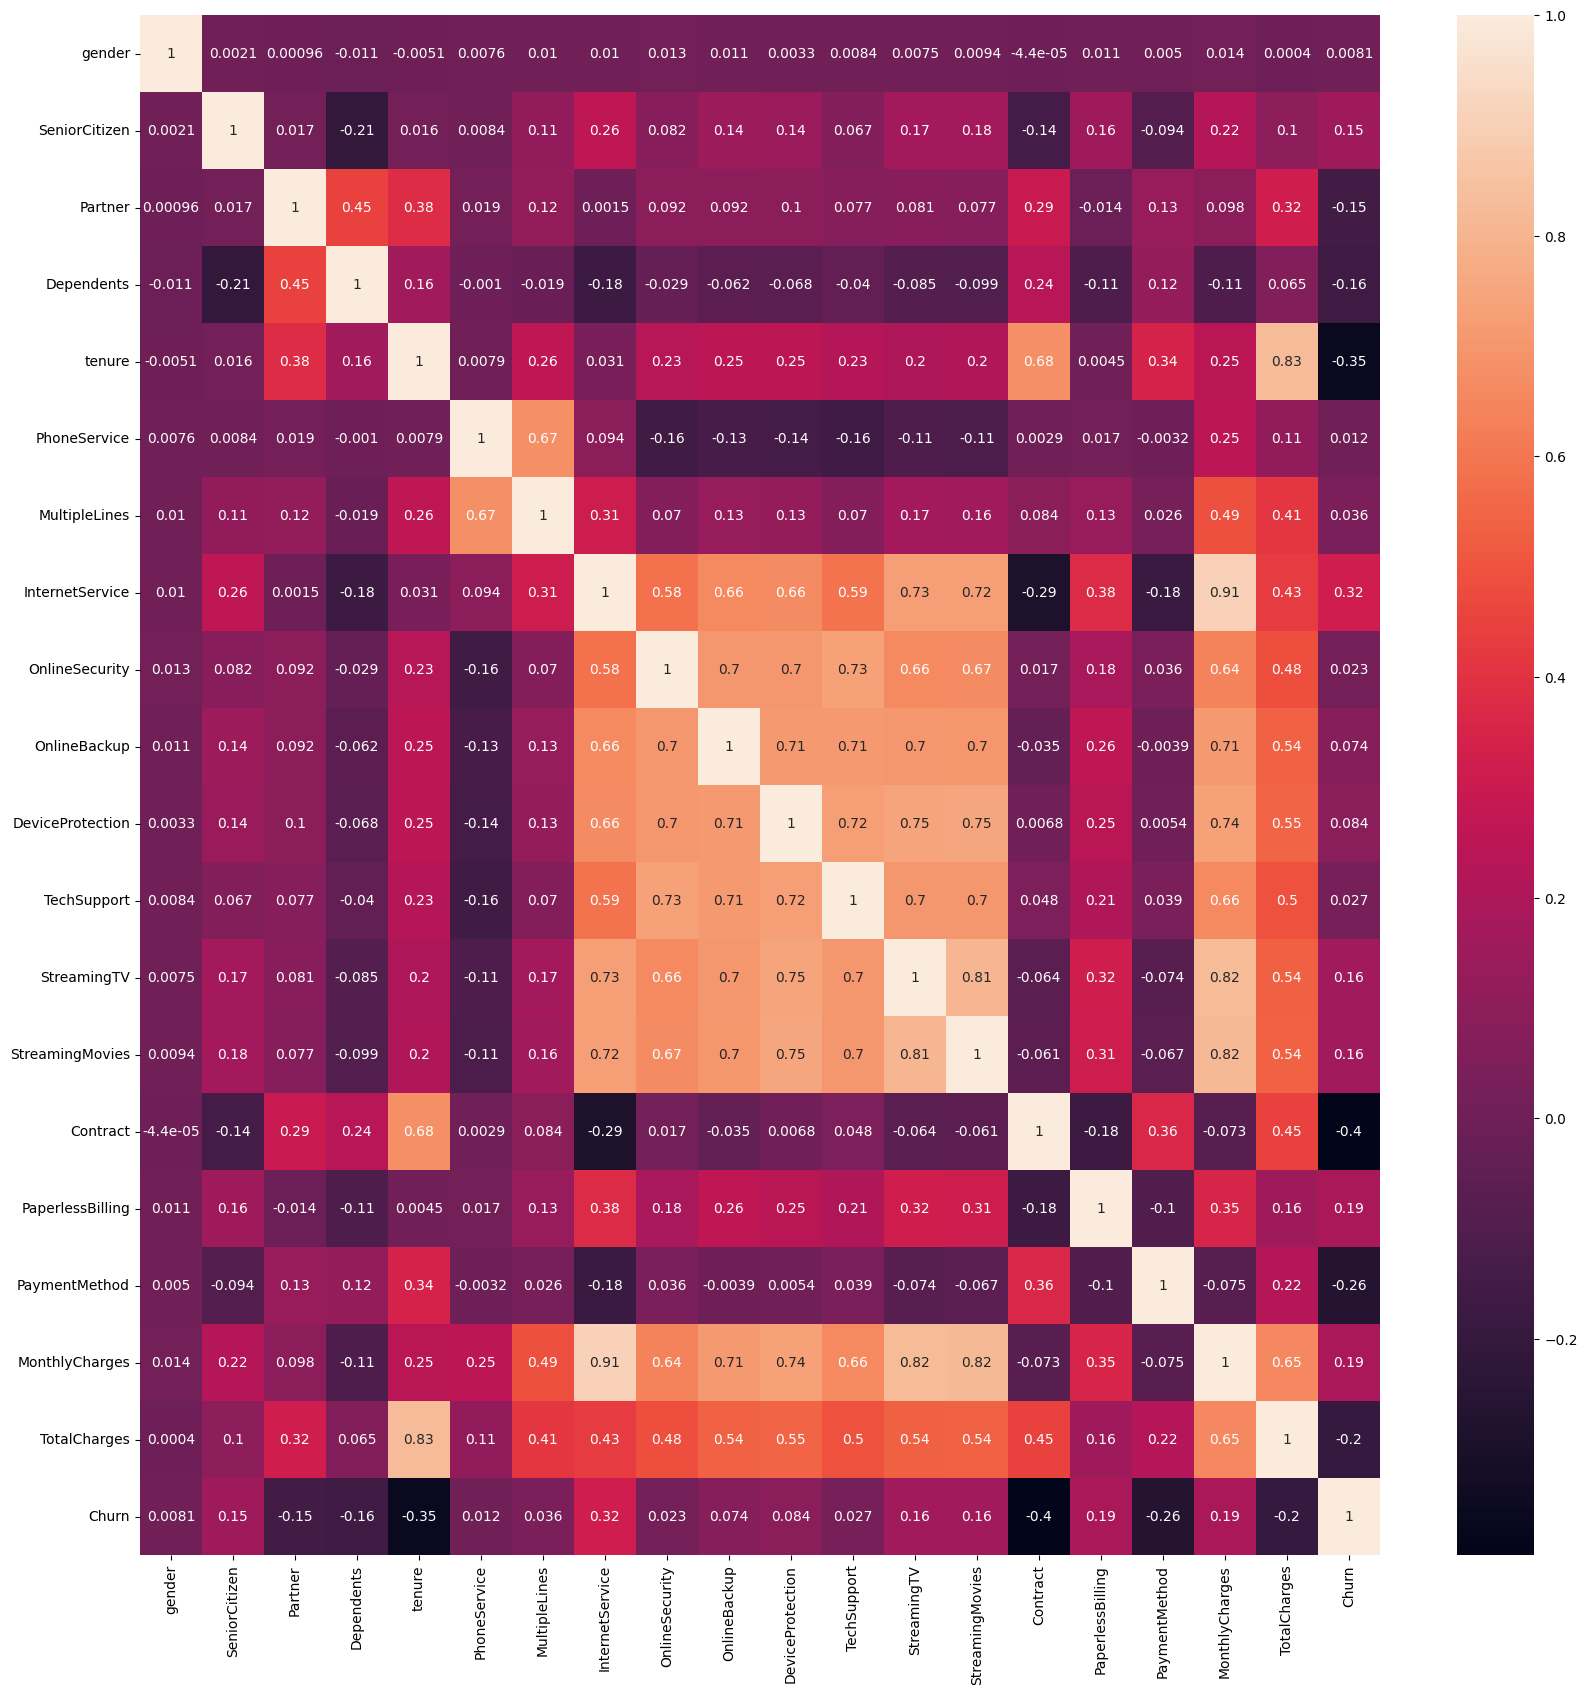

In [185]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Churn', ylabel='count'>

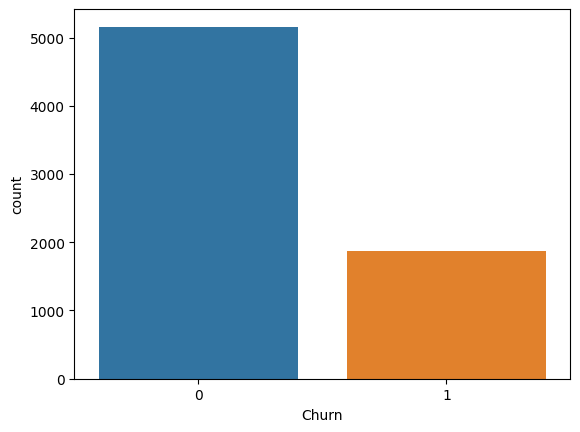

In [186]:
sns.countplot(x='Churn',data=df)

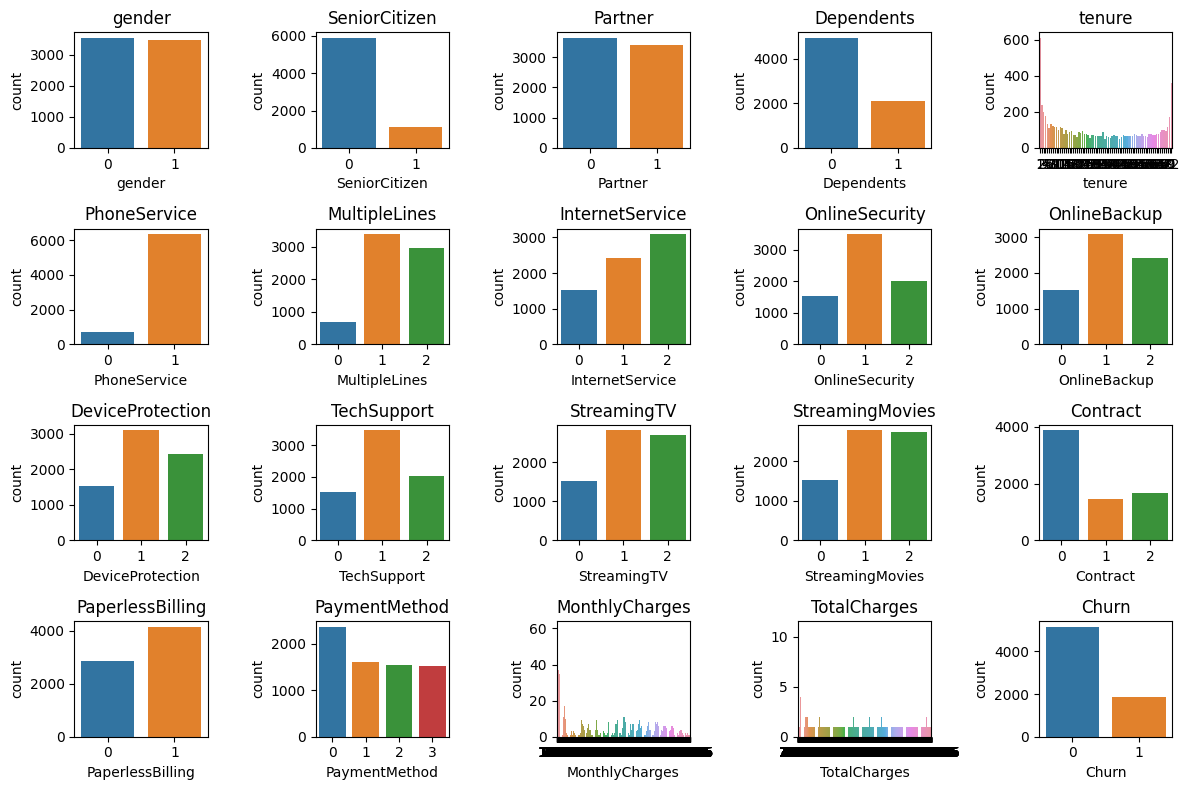

In [187]:
num_cols = len(df.columns)
num_rows = int(num_cols ** 0.5)
num_cols_subplot = int(num_cols / num_rows)
if num_cols_subplot * num_rows < num_cols:
    num_cols_subplot += 1
fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(12, 8))
axes = axes.ravel()
for i, column in enumerate(df.columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

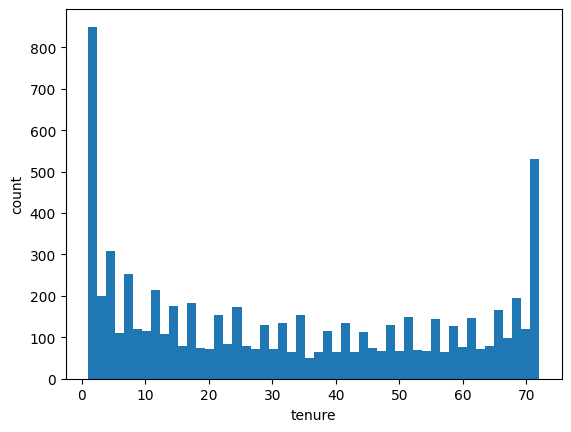

In [204]:
plt.hist(df['tenure'],bins=50)
plt.xlabel('tenure')
plt.ylabel('count')
plt.show()

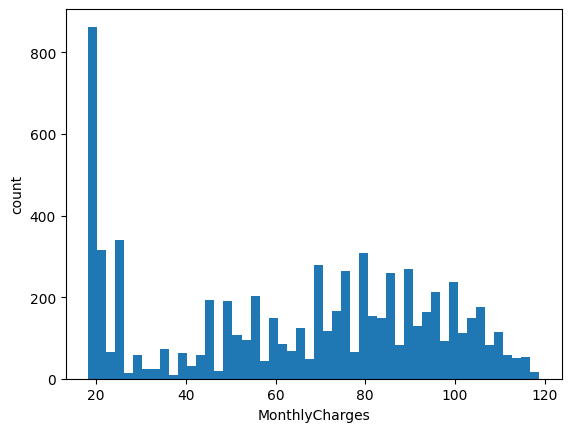

In [205]:
plt.hist(df['MonthlyCharges'],bins=50)
plt.xlabel('MonthlyCharges')
plt.ylabel('count')
plt.show()

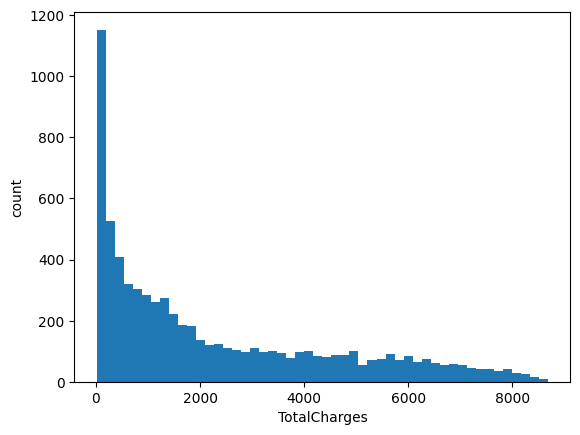

In [206]:
plt.hist(df['TotalCharges'],bins=50)
plt.xlabel('TotalCharges')
plt.ylabel('count')
plt.show()